In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pylab 

In [2]:
## https://jonchar.net/notebooks/matplotlib-styling/
from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

In [3]:

%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

In [4]:
def stylize_axes(ax, title, xlabel, ylabel):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    
    ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [5]:
import re
def get_data(root_folder):
    file_name = "policy_log"
    
    list_real = []
    with open('%s/%s.txt' % (root_folder, file_name), 'r') as f:
        for line in f:
            ls = line.strip()
            match = re.search(r'iter (\d+) \[(.*)\] \[(.*)\]', ls)

            if match:
                iter, val, real = match.group(1), match.group(2), match.group(3)

            final_real = float(real.split(",")[-1])
            list_real.append(final_real)
            
    return list_real

In [6]:
def plot_ax_data(ax, root_folder, n_datapoint, color, linestyle, label):
    
    list_reals = []
    min_idx = 500
    for f in root_folder:
        list_real = -np.array(get_data(f))
        list_reals.append(list_real)
        
        if min_idx > len(list_real):
            min_idx = len(list_real)
        
    arr_costs = np.array([real[:min_idx] for real in list_reals])
    cost_mean = np.mean(arr_costs, axis=0)
    cost_std  = np.std(arr_costs, axis=0)

    ts = np.arange(n_datapoint, (len(cost_mean)+1)*n_datapoint, n_datapoint)
    hand = ax.plot(ts, cost_mean, color, linestyle=linestyle, label=label)
    ax.fill_between(ts, cost_mean-cost_std, cost_mean+cost_std, color=color, linestyle=linestyle, alpha=0.1)
    
    return ax, hand

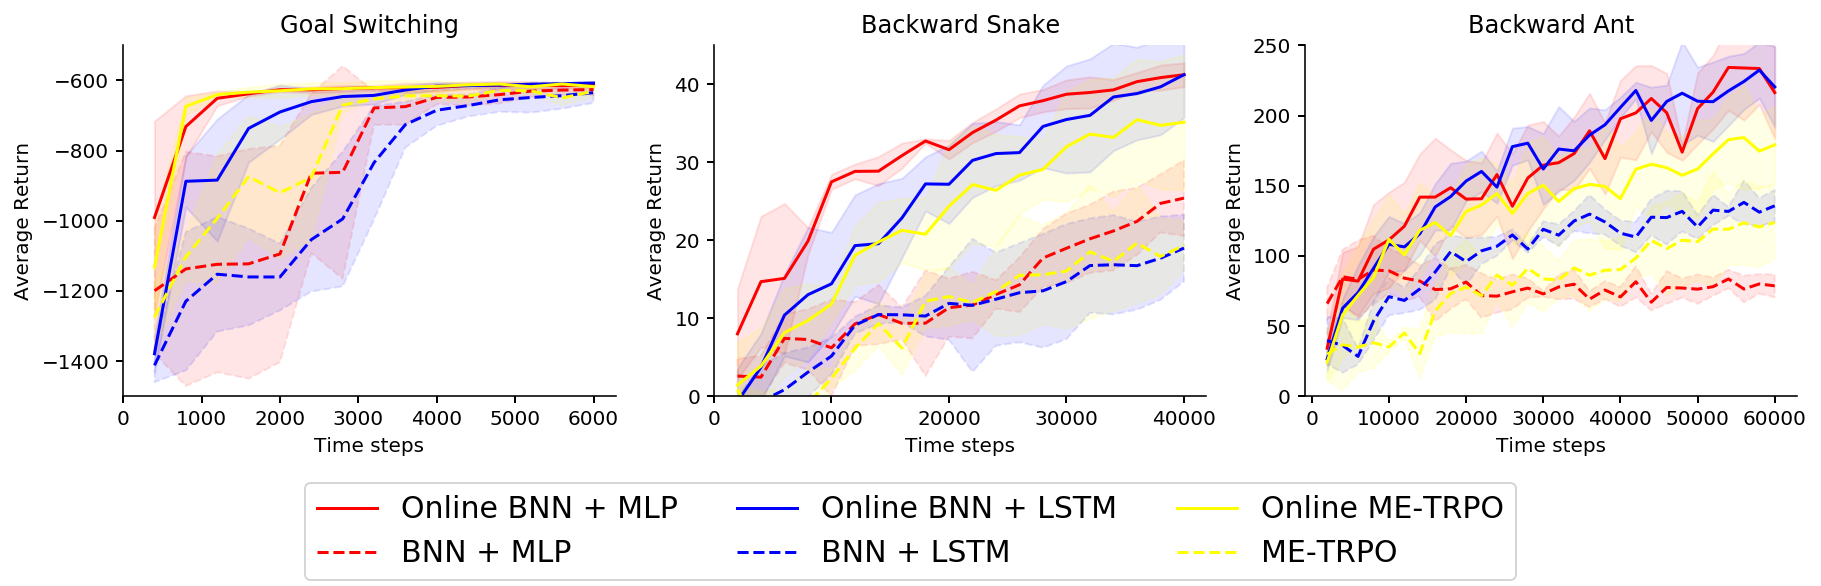

In [7]:
root = "../results/nips/backward"
all_folders = []

envs = ["switching" ,"backward_snake", "backward_ant"]
names = ["Goal Switching", "Backward Snake", "Backward Ant"]
all_n_datapoints = {"switching": [400 for _ in range(6)],
               "backward_snake": [2000 for _ in range(6)],
               "backward_ant": [2000 for _ in range(6)]}
min_rewards = [-1500, 0, 0]
max_rewards = [-500, 45, 250]

x_ticks = {"switching": [i*10**3 for i in range(7)],
           "backward_snake": [i*10**4 for i in range(5)],
           "backward_ant": [i*10**4 for i in range(7)]}

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4.2))
# fig.tight_layout()

i = 0

for env, name, min_reward, max_reward in zip(envs, names, min_rewards, max_rewards):
    
    x = int(i / 2)
    y = i % 2

    handles = []
    colors = ['r', 'r', 'blue', 'blue', 'yellow', 'yellow']
    linestyles = ['-', '--', '-', '--', '-', '--']
    
    labels = ["Online BNN + MLP", "BNN + MLP", "Online BNN + LSTM", "BNN + LSTM", "Online ME-TRPO", "ME-TRPO"]
    models = ["continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc", 
              "continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc",
              "continual_me_trpo_con_vs_nonc", "non_continual_me_trpo_con_vs_nonc"]
    policy = ["", "", "_lstm", "_lstm", "", ""]
    n_datapoints = all_n_datapoints[env]
    
    for p, m, c, ls, l, ndata in zip(policy, models, colors, linestyles, labels, n_datapoints):
        root_folder = ["%s/%s%s/%s/%d" % (root, env, p, m, i) for i in [0, 1, 2]]
        all_folders += root_folder
        _, hand = plot_ax_data(ax[i], root_folder, ndata, c, ls, l)
        handles.append(hand[0])
        
    ax[i].set_xticks(x_ticks[env])                                  
    ax[i].set_ylim(min_reward, max_reward)
    stylize_axes(ax[i], name, "Time steps", "Average Return")
        
    i += 1
        
# ax.legend(handles, labels, bbox_to_anchor=(0.01, 0), loc = 'lower right')
fig.legend(handles,     # The line objects
           labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.2,    # Small spacing around legend box
           ncol=3,
           prop={'size': 15}
           )

pylab.subplots_adjust(bottom=0.3)

fig.savefig("%s/backward_same_comparison.png" % ("../results/nips"), dpi=800, bbox_inches='tight')

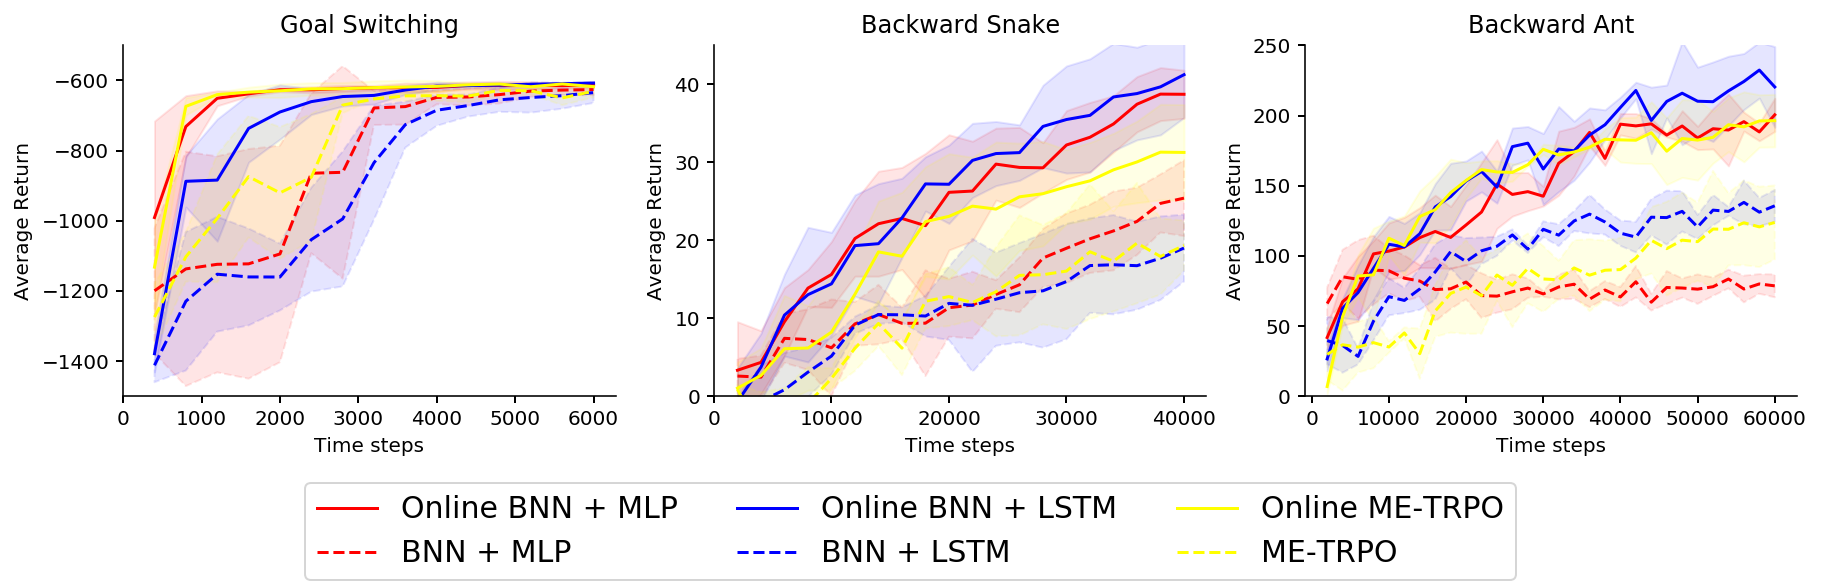

In [20]:
root = "../results/nips/backward_same"
all_folders = []

envs = ["switching" ,"backward_snake", "backward_ant"]
names = ["Goal Switching", "Backward Snake", "Backward Ant"]
all_n_datapoints = {"switching": [400 for _ in range(6)],
               "backward_snake": [2000 for _ in range(6)],
               "backward_ant": [2000 for _ in range(6)]}
min_rewards = [-1500, 0, 0]
max_rewards = [-500, 45, 250]

x_ticks = {"switching": [i*10**3 for i in range(7)],
           "backward_snake": [i*10**4 for i in range(5)],
           "backward_ant": [i*10**4 for i in range(7)]}

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4.2))
# fig.tight_layout()

i = 0

for env, name, min_reward, max_reward in zip(envs, names, min_rewards, max_rewards):
    
    x = int(i / 2)
    y = i % 2

    handles = []
    colors = ['r', 'r', 'blue', 'blue', 'yellow', 'yellow']
    linestyles = ['-', '--', '-', '--', '-', '--']
    
#     labels = ["Online BNN + MLP", "BNN + MLP", "Online BNN + LSTM", "BNN + LSTM", "Online ME-TRPO", "ME-TRPO"]
#     models = ["continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc", 
#               "continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc",
#               "continual_me_trpo_con_vs_nonc", "non_continual_me_trpo_con_vs_nonc"]
#     policy = ["", "", "_lstm", "_lstm", "", ""]
    colors = ['r', 'r', 'blue', 'blue', 'yellow', 'yellow']
    linestyles = ['-', '--', '-', '--', '-', '--']
    
    labels = ["Online BNN + MLP", "BNN + MLP", "Online BNN + LSTM", "BNN + LSTM", "Online ME-TRPO", "ME-TRPO"]
    models = ["continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc",
              "continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc",
              "continual_me_trpo_con_vs_nonc", "non_continual_me_trpo_con_vs_nonc"]
    ablation = ["", "", "", "", "", ""]
    policy = ["_mlp", "_mlp", "_lstm", "_lstm", "_mlp", "_mlp"]

    n_datapoints = all_n_datapoints[env]
    
    for a, p, m, c, ls, l, ndata in zip(ablation, policy, models, colors, linestyles, labels, n_datapoints):
        root_folder = ["%s/%s%s%s/%s/%d" % (root, a, env, p, m, i) for i in [0, 1, 2]]
        all_folders += root_folder
        _, hand = plot_ax_data(ax[i], root_folder, ndata, c, ls, l)
        handles.append(hand[0])
        
    ax[i].set_xticks(x_ticks[env])                                  
    ax[i].set_ylim(min_reward, max_reward)
    stylize_axes(ax[i], name, "Time steps", "Average Return")
        
    i += 1
        
# ax.legend(handles, labels, bbox_to_anchor=(0.01, 0), loc = 'lower right')
fig.legend(handles,     # The line objects
           labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.2,    # Small spacing around legend box
           ncol=3,
           prop={'size': 15}
           )

pylab.subplots_adjust(bottom=0.3)

# fig.savefig("%s/backward_same_comparison.png" % ("../results/nips"), dpi=800, bbox_inches='tight')

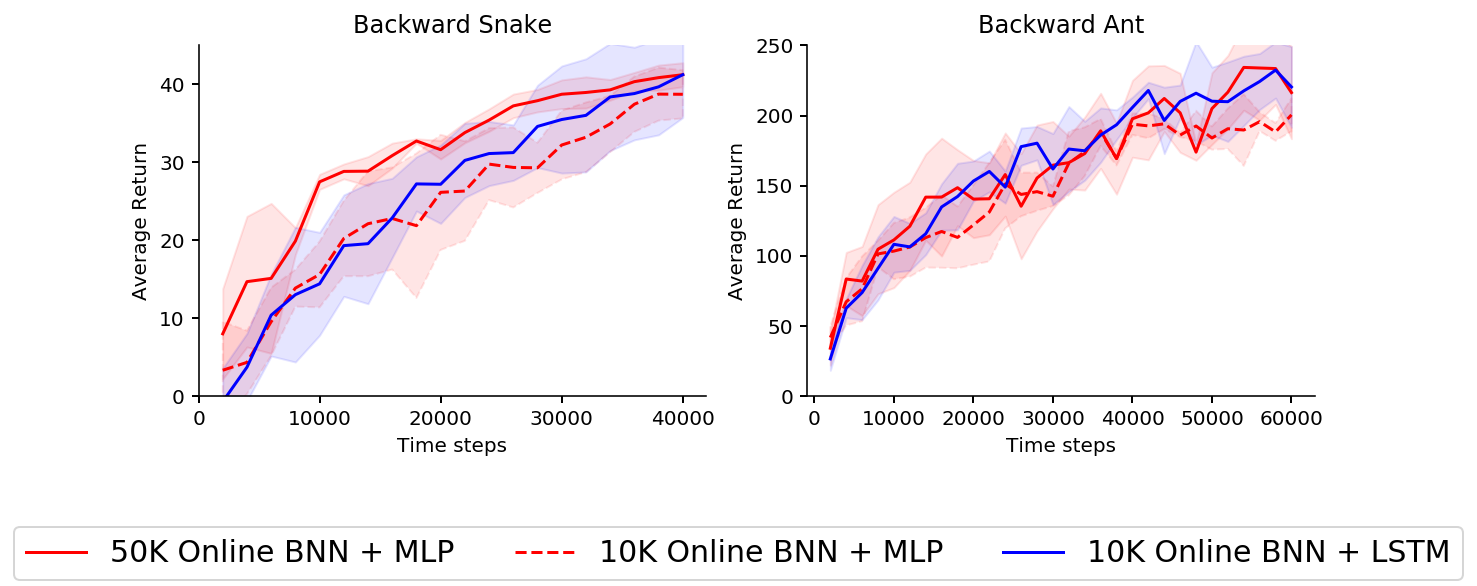

In [19]:
root = "../results/nips/backward_ablation"
all_folders = []

envs = ["backward_snake", "backward_ant"]
names = ["Backward Snake", "Backward Ant"]
all_n_datapoints = {"backward_snake": [2000 for _ in range(6)],
               "backward_ant": [2000 for _ in range(6)]}
min_rewards = [0, 0]
max_rewards = [45, 250]

x_ticks = {"backward_snake": [i*10**4 for i in range(5)],
           "backward_ant": [i*10**4 for i in range(7)]}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.2))
# fig.tight_layout()

i = 0

for env, name, min_reward, max_reward in zip(envs, names, min_rewards, max_rewards):
    
    x = int(i / 2)
    y = i % 2

    handles = []
#     colors = ['r', 'blue', 'yellow']
#     linestyles = ['-', '-' '-', '--', '-', '--']
    
#     labels = ["Online BNN + MLP", "BNN + MLP", "Online BNN + LSTM", "BNN + LSTM", "Online ME-TRPO", "ME-TRPO"]
#     models = ["continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc", 
#               "continual_bnn_trpo_con_vs_nonc", "non_continual_bnn_trpo_con_vs_nonc",
#               "continual_me_trpo_con_vs_nonc", "non_continual_me_trpo_con_vs_nonc"]
#     policy = ["", "", "_lstm", "_lstm", "", ""]
    colors = ['r', 'r', 'blue']
    linestyles = ['-', '--', '-']
    
    labels = ["50K Online BNN + MLP", "10K Online BNN + MLP", "10K Online BNN + LSTM"]
    models = ["continual_bnn_trpo_con_vs_nonc", "continual_bnn_trpo_con_vs_nonc", "continual_bnn_trpo_con_vs_nonc"]
    ablation = ["", "", ""]
    policy = ["_50k_mlp", "_10k_mlp", "_lstm"]

    n_datapoints = all_n_datapoints[env]
    
    for a, p, m, c, ls, l, ndata in zip(ablation, policy, models, colors, linestyles, labels, n_datapoints):
        root_folder = ["%s/%s%s%s/%s/%d" % (root, a, env, p, m, i) for i in [0, 1, 2]]
        all_folders += root_folder
        _, hand = plot_ax_data(ax[i], root_folder, ndata, c, ls, l)
        handles.append(hand[0])
        
    ax[i].set_xticks(x_ticks[env])                                  
    ax[i].set_ylim(min_reward, max_reward)
    stylize_axes(ax[i], name, "Time steps", "Average Return")
        
    i += 1
        
# ax.legend(handles, labels, bbox_to_anchor=(0.01, 0), loc = 'lower right')
fig.legend(handles,     # The line objects
           labels,   # The labels for each line
           loc="lower center",   # Position of legend
           borderaxespad=0.2,    # Small spacing around legend box
           ncol=3,
           prop={'size': 15}
           )

pylab.subplots_adjust(bottom=0.3)

fig.savefig("%s/backward_ablation_comparison.png" % ("../results/nips"), dpi=800, bbox_inches='tight')

In [21]:
import json
def load_params(param_path):
    with open(param_path, 'r') as f:
        params = json.load(f)

    return params

print("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s" % ("Env", "Model", "Policy", "Iters", "#Models", "BatchSize", "Scale", "InnerIters", "InnerBatchSize"))
for folder in all_folders:
    params = load_params("%s/params.json" % folder)
    dyn_params = params["dynamics_params"]
    dyn_opt_params = params["dynamics_opt_params"]
    pol_opt_params = params["policy_opt_params"]
    pol_type = "lstm" if "lstm" in folder else "mlp"
    print("%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s" % (params["env"], params["model"], pol_type, params["sweep_iters"], 
          dyn_params["n_nets"], dyn_opt_params["batch_size"], dyn_opt_params["scale"],
          pol_opt_params["max_iters"], pol_opt_params["trpo"]["batch_size"])
         )

Env	Model	Policy	Iters	#Models	BatchSize	Scale	InnerIters	InnerBatchSize
diffdrive	BNN	mlp	55	5	100	1.0	50	4000
diffdrive	BNN	mlp	55	5	100	1.0	50	4000
diffdrive	BNN	mlp	55	5	100	1.0	50	4000
diffdrive	BNN	mlp	55	5	100	1.0	50	4000
diffdrive	BNN	mlp	55	5	100	1.0	50	4000
diffdrive	BNN	mlp	55	5	100	1.0	50	4000
diffdrive	BNN	lstm	55	5	100	1.0	50	4000
diffdrive	BNN	lstm	55	5	100	1.0	50	4000
diffdrive	BNN	lstm	55	5	100	1.0	50	4000
diffdrive	BNN	lstm	55	5	100	1.0	50	4000
diffdrive	BNN	lstm	55	5	100	1.0	50	4000
diffdrive	BNN	lstm	55	5	100	1.0	50	4000
diffdrive	ME	mlp	55	5	100	1.0	50	4000
diffdrive	ME	mlp	55	5	100	1.0	50	4000
diffdrive	ME	mlp	55	5	100	1.0	50	4000
diffdrive	ME	mlp	55	5	100	1.0	50	4000
diffdrive	ME	mlp	55	5	100	1.0	50	4000
diffdrive	ME	mlp	55	5	100	1.0	50	4000
backward_snake	BNN	mlp	50	20	100	5.0	100	10000
backward_snake	BNN	mlp	50	20	100	5.0	100	10000
backward_snake	BNN	mlp	50	20	100	5.0	100	10000
snake	BNN	mlp	50	20	100	5.0	100	50000
snake	BNN	mlp	50	20	100	25.0	100	50000
snake	B